In [1]:
from  sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
columns = ['sepal_length','sepal_width','petal_length','petal_width']
df = pd.DataFrame(iris.data,columns=columns)
df['target'] = iris.target
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


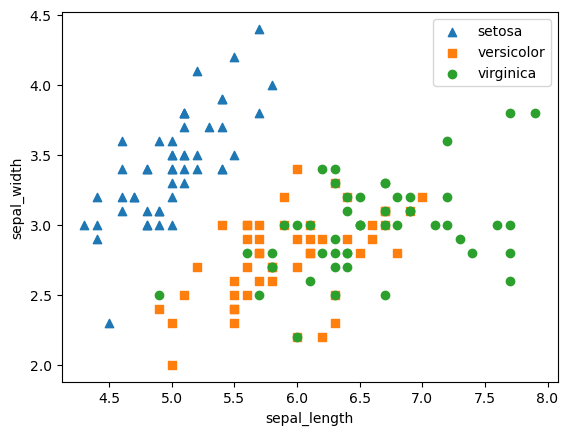

In [6]:
markers=['^','s','o']
for i,marker in enumerate(markers):
    x = df[df['target']==i]['sepal_length']
    y = df[df['target']==i]['sepal_width']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

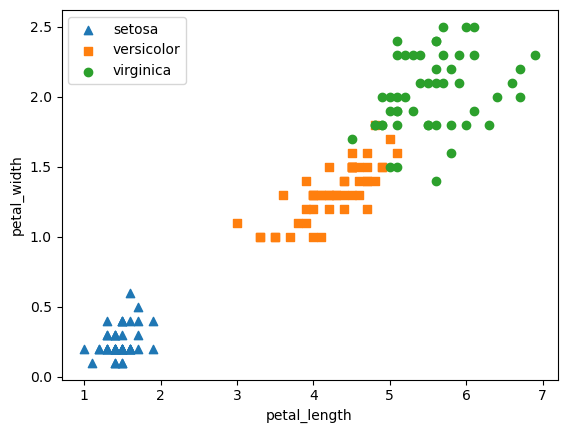

In [18]:
markers=['^','s','o']
for i,marker in enumerate(markers):
    x = df[df['target']==i]['petal_length']
    y = df[df['target']==i]['petal_width']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:
df_scaled = StandardScaler().fit_transform(df.iloc[:,:-1])

In [10]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [20]:
df_pca.shape

(150, 2)

In [21]:
df_pca1 = pd.DataFrame(df_pca,columns=['pca1','pca2'])

In [22]:
df_pca1['target'] = iris.target
df_pca1.head(2)

,pca1,pca2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0


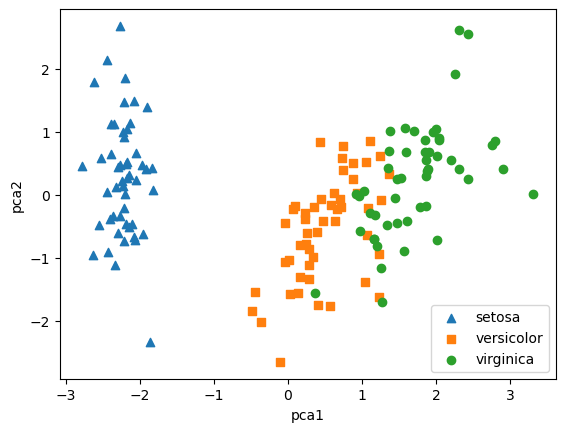

In [23]:
markers=['^','s','o']
for i,marker in enumerate(markers):
    x = df_pca1[df_pca1['target']==i]['pca1']
    y = df_pca1[df_pca1['target']==i]['pca2']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()

In [25]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [26]:
0.72962445+0.22850762

0.95813207

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [28]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf,
                         iris.data,
                         iris.target,
                         scoring='accuracy',
                         cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [30]:
df_pca1
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf,
                         df_pca1.iloc[:,:-1],
                         df_pca1.iloc[:,-1],
                         scoring='accuracy',
                         cv=3)
print(scores)
print(np.mean(scores))

[0.88 0.88 0.88]
0.88
